In [24]:
# from IPython.display import Image
from IPython.display import SVG
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model, model_to_dot
from tensorflow.keras.layers import Dropout
import visualkeras

df = pd.read_csv('Data/abalone.csv')

In [25]:
# Label encoding for the categorical feature
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

# Separating the features and target variable
features = df.drop('Rings', axis=1)
target = df['Rings']

sc = StandardScaler()
features = sc.fit_transform(features)

In [26]:
# Split the dataset into the training set and test set
# We're splitting the data in 1/3, so out of 30 records, 10 records will go into the test set,
# and 20 records will go into the training set.
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=0)

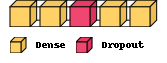

In [136]:
# Initialising the Neural Network
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units=20, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=20, activation='relu', input_dim=x_train.shape[1]))
# Dropout
model.add(Dropout(0.2))

# Add another hidden layer
model.add(Dense(units=5, activation='linear'))

# Dropout
#model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))


# Compiling the Neural Network
model.compile(optimizer='adam', loss='mean_squared_error')

# Plot
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
#SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))
# visualkeras.graph_view(model)	
visualkeras.layered_view(model, legend=True)



# Display the image in jupyter
#Image(filename='model.png')

In [137]:
# Train the model
model.fit(x_train, y_train, batch_size=15, epochs=50)

Epoch 1/50
187/187 [==============================] - 0s 560us/step - loss: 88.7820
Epoch 2/50
187/187 [==============================] - 0s 539us/step - loss: 17.7026
Epoch 3/50
187/187 [==============================] - 0s 537us/step - loss: 7.9682
Epoch 4/50
187/187 [==============================] - 0s 549us/step - loss: 8.1736
Epoch 5/50
187/187 [==============================] - 0s 546us/step - loss: 8.2005
Epoch 6/50
187/187 [==============================] - 0s 553us/step - loss: 7.8660
Epoch 7/50
187/187 [==============================] - 0s 546us/step - loss: 7.5741
Epoch 8/50
187/187 [==============================] - 0s 555us/step - loss: 7.5627
Epoch 9/50
187/187 [==============================] - 0s 554us/step - loss: 7.5118
Epoch 10/50
187/187 [==============================] - 0s 625us/step - loss: 6.6474
Epoch 11/50
187/187 [==============================] - 0s 573us/step - loss: 6.6969
Epoch 12/50
187/187 [==============================] - 0s 539us/step - loss: 6.4266

In [138]:
# Predicting on the training and test set
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluating the model
print("Train set RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train set RMSE: 2.0452685214395387
Test set RMSE: 2.101447765881788
